# Advanced Lane Line detection
---
#### - Ameya Wagh
---

## Importing necessary Modules 

In [23]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpimg
import glob
%matplotlib inline

### Defining a Camera Model class which models the properties of camera, such as distortion and perspective transformation necessary for correct detection of lines

In [165]:
class CameraModel:
    ''' Model of a pinhole camera used for undistorting images '''
    
    def __init__(self,nx=9,ny=6,calibration_path = 'camera_cal/calibration*.jpg'):
        self.calibration_images = glob.glob(calibration_path)
        self.nx = nx
        self.ny = ny
        self.is_calibrated = False    
    
    def calibrate(self,display=True):
        object_pts = []
        image_pts = []
        
        objpts = np.zeros((self.nx*self.ny,3),np.float32)
        objpts[:,:2] = np.mgrid[0:self.nx, 0:self.ny].T.reshape(-1,2)
        
        for image_file in self.calibration_images:
            img = cv2.imread(image_file)
            gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            ret, corners = cv2.findChessboardCorners(gray, (self.nx,self.ny), None)
            if ret == True:
                object_pts.append(objpts)
                image_pts.append(corners)
        ret, self.mtx, self.dist, rvecs, tvecs = cv2.calibrateCamera(
                                                    object_pts,image_pts,
                                                    gray.shape[::-1],None,None)
        is_calibrated = True
        print('[info] camera calibration complete')
    
    def undistort(self, image):
        return cv2.undistort(image,self.mtx,self.dist,None,self.mtx)
    
    def perspectivet_transform(self,image):
        undist_img = self.undistort(image)
        gray = cv2.cvtColor(undist_img, cv2.COLOR_BGR2GRAY)
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
        
        offset = 75 # offset for dst points
        img_size = (gray.shape[1], gray.shape[0])
        h,w = gray.shape[:2]

        pt1 = [w // 2 - offset, h* 0.625]
        pt2 = [w // 2 + offset, h * 0.625]
        pt3 = [offset, h]
        pt4 = [w - offset, h]

        src = np.float32([pt1, pt2, pt3, pt4])

        dp1 = [offset, 0]
        dp2 = [w - offset, 0]
        dp3 = [offset, h]
        dp4 = [w - offset, h]
        dst = np.float32([dp1, dp2, dp3, dp4])
        
        M = cv2.getPerspectiveTransform(src, dst)
        warped = cv2.warpPerspective(image, M, img_size)
        return warped, M

## creating instance of CameraModel

In [166]:
camera = CameraModel(calibration_path = 'camera_cal/calibration*.jpg')

## Calibrating camera

In [167]:
camera.calibrate()

[info] camera calibration complete


## Correcting image distortion

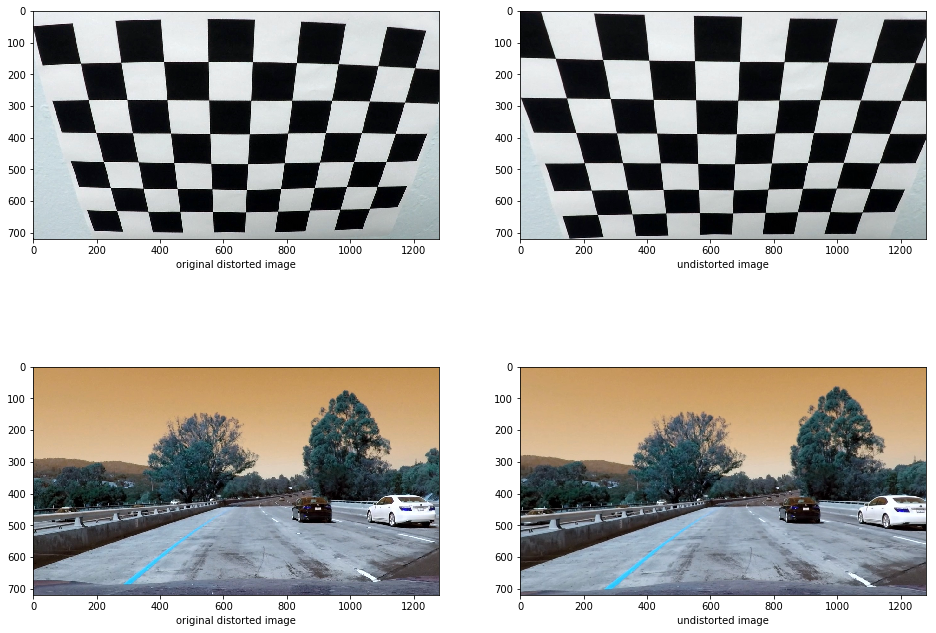

In [168]:
distorted_image_1 = cv2.imread(glob.glob("./camera_cal/calibration2.jpg")[0])
distorted_image_2 = cv2.imread(glob.glob("./test_images/test1.jpg")[0])

undistorted_img_1 = camera.undistort(distorted_image_1)
undistorted_img_2 = camera.undistort(distorted_image_2)

plt.figure(figsize=(16,12))
plt.subplot(221)
plt.imshow(distorted_image_1)
plt.xlabel('original distorted image')

plt.subplot(222)
plt.imshow(undistorted_img_1)
plt.xlabel('undistorted image')

plt.subplot(223)
plt.imshow(distorted_image_2)
plt.xlabel('original distorted image')

plt.subplot(224)
plt.imshow(undistorted_img_2)
plt.xlabel('undistorted image')

plt.show()

## Performing Perspective transformation

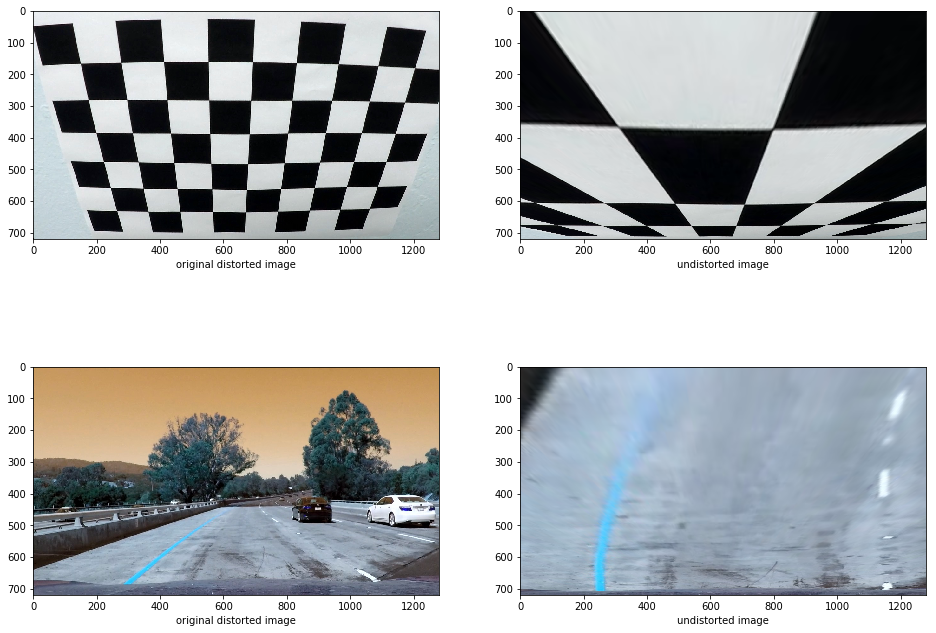

In [171]:
transformed_img_1,_ = camera.perspectivet_transform(distorted_image_1)
transformed_img_2,_ = camera.perspectivet_transform(distorted_image_2)

plt.figure(figsize=(16,12))
plt.subplot(221)
plt.imshow(distorted_image_1)
plt.xlabel('original distorted image')

plt.subplot(222)
plt.imshow(transformed_img_1)
plt.xlabel('undistorted image')

plt.subplot(223)
plt.imshow(distorted_image_2)
plt.xlabel('original distorted image')

plt.subplot(224)
plt.imshow(transformed_img_2)
plt.xlabel('undistorted image')

plt.show()

In [ ]:
class LaneDetector:
    def __init__(self):
        pass